In [61]:
import pandas as pd
data_df=pd.read_csv("obesitydataset_v1.csv")

In [2]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   highcal_intake                  2111 non-null   object 
 6   veg_intake                      2111 non-null   float64
 7   meals_daily                     2111 non-null   float64
 8   snacking                        2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  water_intake_daily              2111 non-null   float64
 11  track_cal_intake                2111 non-null   object 
 12  physical_weekly                 21

In [3]:
data_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,highcal_intake,veg_intake,meals_daily,snacking,SMOKE,water_intake_daily,track_cal_intake,physical_weekly,tech_usage_daily,alcohol_intake,transport_mode,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


<Axes: xlabel='NObeyesdad'>

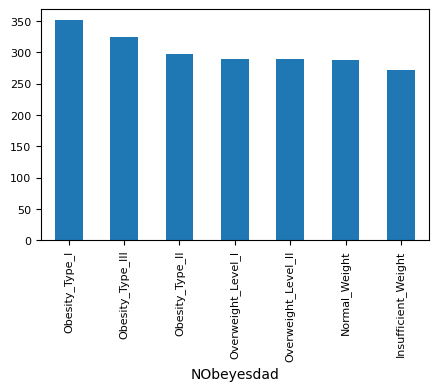

In [4]:
import matplotlib.pyplot as plt
data_df['NObeyesdad'].value_counts().plot(kind='bar', figsize=(5,3), fontsize=8)

<Axes: xlabel='Gender'>

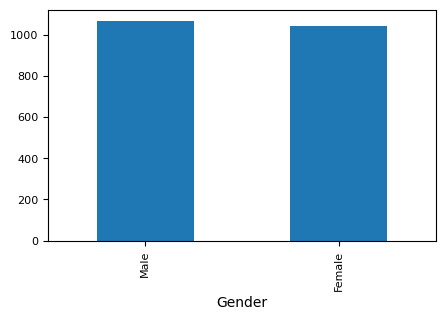

In [5]:
data_df['Gender'].value_counts().plot(kind='bar', figsize=(5,3), fontsize=8)

<Axes: >

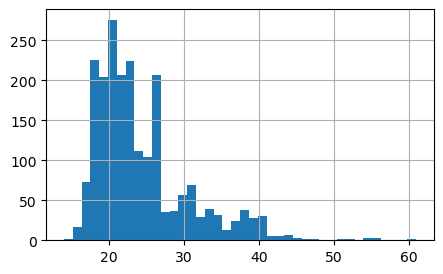

In [6]:
data_df['Age'].hist(bins=40, figsize=(5,3))

<Axes: >

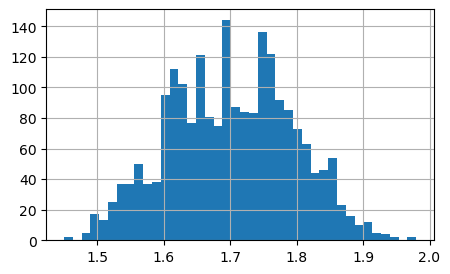

In [7]:
data_df['Height'].hist(bins=40, figsize=(5,3))

<Axes: >

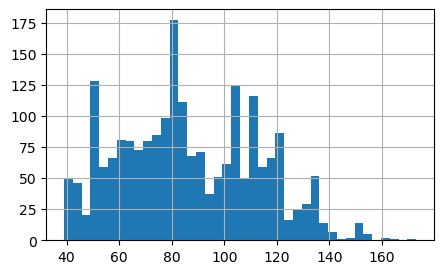

In [8]:
data_df['Weight'].hist(bins=40, figsize=(5,3))

In [9]:
# the male/female is well representative
# age is skewed to the left
# height and weight have a bunch of outliers 

In [10]:
data_df['BMI'] = data_df['Weight']/(data_df['Height']*data_df['Height'])

array([[<Axes: title={'center': 'Insufficient_Weight'}>,
        <Axes: title={'center': 'Normal_Weight'}>,
        <Axes: title={'center': 'Obesity_Type_I'}>],
       [<Axes: title={'center': 'Obesity_Type_II'}>,
        <Axes: title={'center': 'Obesity_Type_III'}>,
        <Axes: title={'center': 'Overweight_Level_I'}>],
       [<Axes: title={'center': 'Overweight_Level_II'}>, <Axes: >,
        <Axes: >]], dtype=object)

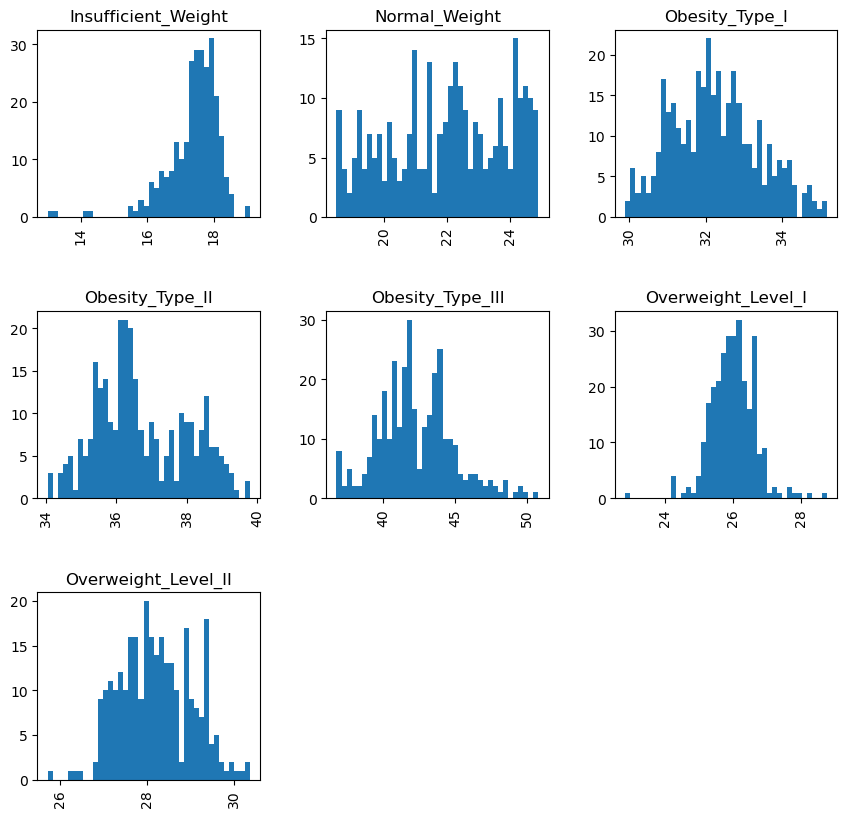

In [11]:
data_df.hist('BMI', by='NObeyesdad', bins=40, figsize=(10,10))

In [12]:
# data_df.drop('BMI', axis=1,inplace=True)
data_df.drop('Height', axis=1, inplace=True)
data_df.drop('Weight', axis=1, inplace=True)

In [13]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   object 
 3   highcal_intake                  2111 non-null   object 
 4   veg_intake                      2111 non-null   float64
 5   meals_daily                     2111 non-null   float64
 6   snacking                        2111 non-null   object 
 7   SMOKE                           2111 non-null   object 
 8   water_intake_daily              2111 non-null   float64
 9   track_cal_intake                2111 non-null   object 
 10  physical_weekly                 2111 non-null   float64
 11  tech_usage_daily                2111 non-null   float64
 12  alcohol_intake                  21

In [14]:
from category_encoders.ordinal import OrdinalEncoder

In [15]:
data_df['Gender'].unique()


array(['Female', 'Male'], dtype=object)

In [63]:
maplist= [
    {'col': 'Gender',
     'mapping': {'Male': 0, 'Female': 1}},
    {'col':'snacking',
    'mapping': {'no':0,'Sometimes':1,'Frequently':2,'Always':3}},
    {'col':'alcohol_intake',
          'mapping':{'no':0,
                     'Sometimes':1,
                     'Frequently':2}},
{'col':'family_history_with_overweight',
 'mapping':{'yes':1, 'no':0}},
 {'col':'highcal_intake',
 'mapping':{'yes':1, 'no':0}},
 {'col':'SMOKE',
 'mapping':{'yes':1, 'no':0}},
  {'col':'track_cal_intake',
 'mapping':{'yes':1, 'no':0}}
   ]
oenc = OrdinalEncoder(mapping=maplist)
data_df = oenc.fit_transform(data_df)
data_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,highcal_intake,veg_intake,meals_daily,snacking,SMOKE,water_intake_daily,track_cal_intake,physical_weekly,tech_usage_daily,alcohol_intake,transport_mode,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0.0,Public_Transportation,Normal_Weight
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1.0,Public_Transportation,Normal_Weight
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2.0,Public_Transportation,Normal_Weight
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2.0,Walking,Overweight_Level_I
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1.0,Public_Transportation,Overweight_Level_II


In [65]:
data_df['snacking'].unique()

array([1, 2, 3, 0])

In [67]:
data_df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [69]:
maplist= [
    {'col': 'NObeyesdad',
     'mapping': {'Normal_Weight': 0, 'Overweight_Level_I': 1,'Overweight_Level_II':2,
                'Obesity_Type_I':3,'Insufficient_Weight':4,'Obesity_Type_II':5,'Obesity_Type_III':6 }}]

oenc = OrdinalEncoder(mapping=maplist)
data_df = oenc.fit_transform(data_df)
data_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,highcal_intake,veg_intake,meals_daily,snacking,SMOKE,water_intake_daily,track_cal_intake,physical_weekly,tech_usage_daily,alcohol_intake,transport_mode,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0.0,Public_Transportation,0
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1.0,Public_Transportation,0
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2.0,Public_Transportation,0
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2.0,Walking,1
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1.0,Public_Transportation,2


In [73]:
# Create the OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, dtype='int64')
# Fit the encoder
one_hot_encoded = encoder.fit_transform(data_df[['transport_mode',]])
# create data frame with encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded,
 columns=encoder.get_feature_names_out(['transport_mode']))


In [75]:
# Concatenate the one-hot encoded dataframe with the original dataframe
data_df = pd.concat([data_df, one_hot_df], axis=1)
# Drop the original categorical columns
data_df = data_df.drop(['transport_mode'], axis=1)
data_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,highcal_intake,veg_intake,meals_daily,snacking,SMOKE,...,track_cal_intake,physical_weekly,tech_usage_daily,alcohol_intake,NObeyesdad,transport_mode_Automobile,transport_mode_Bike,transport_mode_Motorbike,transport_mode_Public_Transportation,transport_mode_Walking
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,...,0,0.0,1.0,0.0,0,0,0,0,1,0
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,...,1,3.0,0.0,1.0,0,0,0,0,1,0
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,...,0,2.0,1.0,2.0,0,0,0,0,1,0
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,...,0,2.0,0.0,2.0,1,0,0,0,0,1
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,...,0,0.0,0.0,1.0,2,0,0,0,1,0


In [77]:
data_df.to_csv("obesitydataset_v1_pre.csv", index=False)

In [79]:
data_df = pd.read_csv("obesitydataset_v1_pre.csv")
data_df


,Gender,Age,Height,Weight,family_history_with_overweight,highcal_intake,veg_intake,meals_daily,snacking,SMOKE,...,track_cal_intake,physical_weekly,tech_usage_daily,alcohol_intake,NObeyesdad,transport_mode_Automobile,transport_mode_Bike,transport_mode_Motorbike,transport_mode_Public_Transportation,transport_mode_Walking
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,...,0,0.000000,1.000000,0.0,0,0,0,0,1,0
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,...,1,3.000000,0.000000,1.0,0,0,0,0,1,0
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,...,0,2.000000,1.000000,2.0,0,0,0,0,1,0
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,...,0,2.000000,0.000000,2.0,1,0,0,0,0,1
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,...,0,0.000000,0.000000,1.0,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,...,0,1.676269,0.906247,1.0,6,0,0,0,1,0
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,...,0,1.341390,0.599270,1.0,6,0,0,0,1,0
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,...,0,1.414209,0.646288,1.0,6,0,0,0,1,0
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,...,0,1.139107,0.586035,1.0,6,0,0,0,1,0


In [81]:
X = data_df.drop(columns = ['NObeyesdad'])
y = data_df['NObeyesdad']
# Check to make sure they have the same length
print(X.shape)
print(y.shape)


(2111, 20)
(2111,)


In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1688, 20) (423, 20) (1688,) (423,)


In [97]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calcul
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf_tree = DecisionTreeClassifier(random_state=42) # good values 13,15 depending on
# Train Decision Tree Classifer
clf_tree = clf_tree.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf_tree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9361702127659575
F1: 0.9361328685525969


In [99]:
from sklearn.ensemble import RandomForestClassifier # Import Random Forest
clf_rfc = RandomForestClassifier(
 n_estimators = 100, # default
 max_features='sqrt',
 class_weight='balanced', # ensure balanced weights to account for class imbalan
 random_state=42)


In [101]:
clf_rfc = clf_rfc.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf_rfc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9408983451536643
F1: 0.9422433779501631


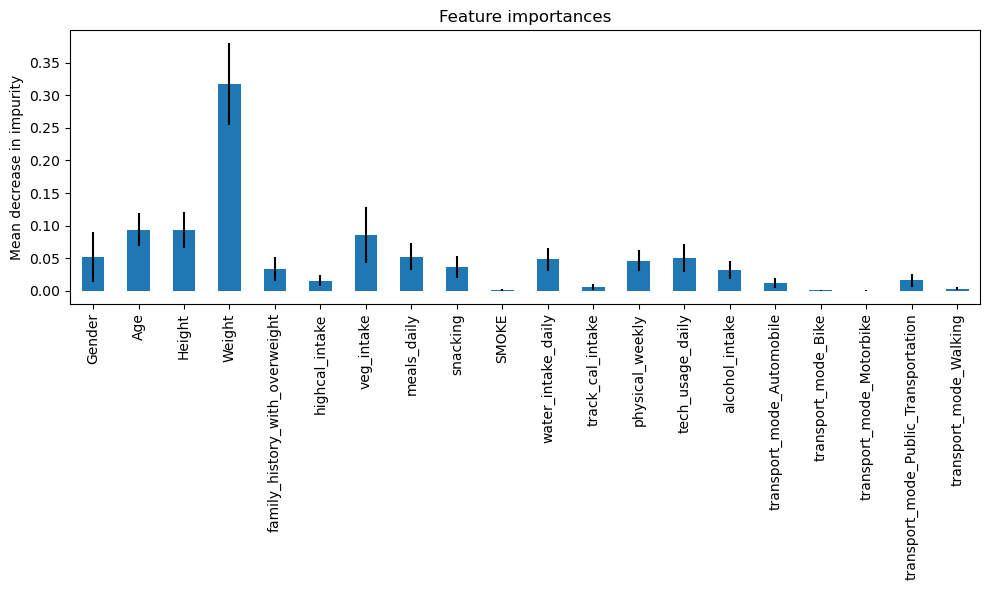

In [103]:
import numpy as np
importances = clf_rfc.feature_importances_
# For visualisation: create a pandas series with the importance values
forest_importances = pd.Series(importances, index=X_train.columns)
std = np.std([tree.feature_importances_ for tree in clf_rfc.estimators_], axis=0)
# Configure the plot
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, figsize=(10,6))
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
